# Data Analysis: Comparisons between Airbnb Data and Rental Prices

In this notebook, we loaded in barcelona total housing data, airbnb data, and rental price data. We then analyzed and overlaid this information to look for trends.

## Import Libraries

In [2]:
# Import geopandas
import geopandas as gpd

# and regular pandas
import pandas as pd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

from matplotlib import colors
import matplotlib as mpl

import numpy as np

# for interactive maps
import plotly.express as px

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## File Load

In [3]:
# Load in barri geojson file, airbnb total data file, and airbnb entire apartment data file
bnb_eh = gpd.read_file('Data/airbnb_data_barcelona_entire_apartment.geojson')
bnb_tot = gpd.read_file('Data/airbnb_data_barcelona_total.geojson')
rent = gpd.read_file('Data/barcelona_rent_data.geojson')

## File Cleanup

### Clean the Airbnb entire apt and total dataframes

In [ ]:
bnb_tot.head()

In [ ]:
list(bnb_eh)

In [4]:
# trim bnb data frames
bnb_eh_tr = bnb_eh[['c_barri',
 'bnb16_per_1000',
 'bnb17_per_1000',
 'bnb18_per_1000',
 'bnb19_per_1000',
 'bnb20_per_1000',
 'bnb16-17 % Change',
 'bnb17-18 % Change',
 'bnb18-19 % Change',
 'bnb19-20 % Change'
 ]]
bnb_tot_tr = bnb_tot[['c_barri',
 'bnb16_per_1000',
 'bnb17_per_1000',
 'bnb18_per_1000',
 'bnb19_per_1000',
 'bnb20_per_1000',
 'bnb16-17 % Change',
 'bnb17-18 % Change',
 'bnb18-19 % Change',
 'bnb19-20 % Change'
 ]]

In [5]:
# check it 
bnb_tot_tr.head()

c_barri  bnb16_per_1000  bnb17_per_1000  bnb18_per_1000  bnb19_per_1000  \
0       22        7.734174        8.022923       10.547132        6.262360   
1       23        3.209142        3.443688        4.124038        2.537870   
2       25        4.874980        5.187864        4.596608        3.723657   
3       43        2.641814        3.740648        2.969121        2.746437   
4       12        5.012531        3.759398       18.041237       11.597938   

   bnb20_per_1000  bnb16-17 % Change  bnb17-18 % Change  bnb18-19 % Change  \
0       11.498029           3.703704          14.285714         -40.625000   
1        3.397866           7.317073          18.181818         -38.461538   
2        3.950071           6.451613         -12.121212         -18.965517   
3        3.187310          41.666667         -21.568627          -7.500000   
4       16.752577         -25.000000         366.666667         -35.714286   

   bnb19-20 % Change  
0          84.210526  
1          34.375000  
2           6.382979  
3          16.216216  
4          44.444444

### Clean the rent dataframe

In [8]:
rent.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

   2014 Average Monthly Rent (Euros)  2014 Average Monthly Rent (Euros/m^2)  \
0                          1157.9125                                 9.7025   
1                          1039.5050                                13.5175   
2                           940.0200                                11.5575   
3                           567.8525                                 8.9350   
4                           578.4075                                10.4825   

   2015 Average Monthly Rent (Euros)  2015 Average Monthly Rent (Euros/m^2)  \
0                          1030.0475                                12.1975   
1                          1100.4075                                14.4050   
2                          1039.9675                                12.6550   
3                           580.0100                                 9.5725   
4                           624.7375                                10.9975   

   2016 Average Monthly Rent (Euros)  2016 Average Monthly Rent (Euros/m^2)  \
0                          1177.1075                                15.3125   
1                          1188.0025                                15.9475   
2                          1123.6225                                14.2175   
3                           631.1025                                10.6200   
4                           667.3925                                12.2700   

   2017 Average Monthly Rent (Euros)  2017 Average Monthly Rent (Euros/m^2)  \
0                          1231.0100                                16.6600   
1                          1353.5350                                17.4475   
2                          1235.2425                                15.3175   
3                           698.0075                                11.6425   
4                           747.7150                                13.8950   

   ...  2016 Average Monthly Rent (Euros) - Adjusted  \
0  ...                                   1158.680836   
1  ...                                   1169.405284   
2  ...                                   1106.033101   
3  ...                                    621.223102   
4  ...                                    656.945012   

   2017 Average Monthly Rent (Euros) - Adjusted  \
0                                   1198.555427   
1                                   1317.850155   
2                                   1202.676340   
3                                    679.605102   
4                                    728.002105   

   2018 Average Monthly Rent (Euros) - Adjusted  \
0                                    903.690024   
1                                   1310.643429   
2                                   1237.101111   
3                                    719.444505   
4                                    791.526562   

   2019 Average Monthly Rent (Euros) - Adjusted  \
0                                   1145.829373   
1                                   1307.943965   
2                                   1244.740278   
3                                    746.772561   
4                                    812.386963   

   2015 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         12.195061   
1                                         14.402120   
2                                         12.652470   
3                                          9.570586   
4                                         10.995301   

   2016 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         15.072795   
1                                         15.697855   
2                             

In [9]:
list (rent)

['c_barri',
 'n_barri',
 '2014 Average Monthly Rent (Euros)',
 '2014 Average Monthly Rent (Euros/m^2)',
 '2015 Average Monthly Rent (Euros)',
 '2015 Average Monthly Rent (Euros/m^2)',
 '2016 Average Monthly Rent (Euros)',
 '2016 Average Monthly Rent (Euros/m^2)',
 '2017 Average Monthly Rent (Euros)',
 '2017 Average Monthly Rent (Euros/m^2)',
 '2018 Average Monthly Rent (Euros)',
 '2018 Average Monthly Rent (Euros/m^2)',
 '2019 Average Monthly Rent (Euros)',
 '2019 Average Monthly Rent (Euros/m^2)',
 'Percent Change Average Monthly Rent 2014-2015',
 'Percent Change Average Monthly Rent 2015-2016',
 'Percent Change Average Monthly Rent 2016-2017',
 'Percent Change Average Monthly Rent 2017-2018',
 'Percent Change Average Monthly Rent 2018-2019',
 '2015 Average Monthly Rent (Euros) - Adjusted',
 '2016 Average Monthly Rent (Euros) - Adjusted',
 '2017 Average Monthly Rent (Euros) - Adjusted',
 '2018 Average Monthly Rent (Euros) - Adjusted',
 '2019 Average Monthly Rent (Euros) - Adjusted',
 

In [7]:
#trim data frame
rent_tr = rent[['c_barri',
 'n_barri',
 '2014 Average Monthly Rent (Euros)',
 '2015 Average Monthly Rent (Euros) - Adjusted',
 '2016 Average Monthly Rent (Euros) - Adjusted',
 '2017 Average Monthly Rent (Euros) - Adjusted',
 '2018 Average Monthly Rent (Euros) - Adjusted',
 '2019 Average Monthly Rent (Euros) - Adjusted',
 '2014 Average Monthly Rent (Euros/m^2)',
 '2015 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2016 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2017 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2018 Average Monthly Rent (Euros/m^2) - Adjusted',
 '2019 Average Monthly Rent (Euros/m^2) - Adjusted',
 'Percent Change Average Monthly Rent 2014-2015',
 'Percent Change Average Monthly Rent 2015-2016',
 'Percent Change Average Monthly Rent 2016-2017',
 'Percent Change Average Monthly Rent 2017-2018',
 'Percent Change Average Monthly Rent 2018-2019',
 'geometry']]

In [10]:
#check it
rent_tr.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

   2014 Average Monthly Rent (Euros)  \
0                          1157.9125   
1                          1039.5050   
2                           940.0200   
3                           567.8525   
4                           578.4075   

   2015 Average Monthly Rent (Euros) - Adjusted  \
0                                   1029.841532   
1                                   1100.187463   
2                                   1039.759548   
3                                    579.894021   
4                                    624.612577   

   2016 Average Monthly Rent (Euros) - Adjusted  \
0                                   1158.680836   
1                                   1169.405284   
2                                   1106.033101   
3                                    621.223102   
4                                    656.945012   

   2017 Average Monthly Rent (Euros) - Adjusted  \
0                                   1198.555427   
1                                   1317.850155   
2                                   1202.676340   
3                                    679.605102   
4                                    728.002105   

   2018 Average Monthly Rent (Euros) - Adjusted  \
0                                    903.690024   
1                                   1310.643429   
2                                   1237.101111   
3                                    719.444505   
4                                    791.526562   

   2019 Average Monthly Rent (Euros) - Adjusted  \
0                                   1145.829373   
1                                   1307.943965   
2                                   1244.740278   
3                                    746.772561   
4                                    812.386963   

   2014 Average Monthly Rent (Euros/m^2)  \
0                                 9.7025   
1                                13.5175   
2                                11.5575   
3                                 8.9350   
4                                10.4825   

   2015 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         12.195061   
1                                         14.402120   
2                                         12.652470   
3                                          9.570586   
4                                         10.995301   

   2016 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         15.072795   
1                                         15.697855   
2                                         13.994937   
3                                         10.453753   
4                                         12.077923   

   2017 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         16.220773   
1                                         16.987511   
2                                         14.913667   
3                                         11.335555   
4                                         13.528670   

   2018 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         11.612325   
1                                         16.534392   
2                                         15.492723   
3                                         11.378972   
4                                         13.488773   

   2019 Average Monthly Rent (Euros/m^2) - Adjusted  \
0                                         13.151522   
1                                         16.063475   
2                                         15.299684   
3                                         11.862625   
4                                         13

## Merge Dataframes

In [11]:
#merge rent dataframe with total airbnb dataframe
ab_rent = rent_tr.merge(bnb_tot_tr, on='c_barri')

In [12]:
#check it
ab_rent.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

   2014 Average Monthly Rent (Euros)  \
0                          1157.9125   
1                          1039.5050   
2                           940.0200   
3                           567.8525   
4                           578.4075   

   2015 Average Monthly Rent (Euros) - Adjusted  \
0                                   1029.841532   
1                                   1100.187463   
2                                   1039.759548   
3                                    579.894021   
4                                    624.612577   

   2016 Average Monthly Rent (Euros) - Adjusted  \
0                                   1158.680836   
1                                   1169.405284   
2                                   1106.033101   
3                                    621.223102   
4                                    656.945012   

   2017 Average Monthly Rent (Euros) - Adjusted  \
0                                   1198.555427   
1                                   1317.850155   
2                                   1202.676340   
3                                    679.605102   
4                                    728.002105   

   2018 Average Monthly Rent (Euros) - Adjusted  \
0                                    903.690024   
1                                   1310.643429   
2                                   1237.101111   
3                                    719.444505   
4                                    791.526562   

   2019 Average Monthly Rent (Euros) - Adjusted  \
0                                   1145.829373   
1                                   1307.943965   
2                                   1244.740278   
3                                    746.772561   
4                                    812.386963   

   2014 Average Monthly Rent (Euros/m^2)  \
0                                 9.7025   
1                                13.5175   
2                                11.5575   
3                                 8.9350   
4                                10.4825   

   2015 Average Monthly Rent (Euros/m^2) - Adjusted  ...  \
0                                         12.195061  ...   
1                                         14.402120  ...   
2                                         12.652470  ...   
3                                          9.570586  ...   
4                                         10.995301  ...   

                                            geometry  bnb16_per_1000  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...        7.734174   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...        3.209142   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...        4.874980   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...        2.641814   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...       52.166866   

   bnb17_per_1000  bnb18_per_1000  bnb19_per_1000  bnb20_per_1000  \
0        8.022923       10.547132        6.262360       11.498029   
1        3.443688        4.124038        2.537870        3.397866   
2        5.187864        4.596608        3.723657        3.950071   
3        3.740648        2.969121        2.746437        3.187310   
4       61.567323       63.386985       62.175493       79.131109   

   bnb16-17 % Change  bnb17-18 % Change  bnb18-19 % Change bnb19-20 % Change  
0           3.703704          14.285714         -40.625000         84.210526  
1           7.317073          18.181818         -38.461538         34.375000  
2           6.451613         -12.121212         -18.965517          6.382979  
3          41.666667         -21.568627          -7.500000         16.216216  
4          18.070319           1.454294

## Quartiles

Set quartiles for each of the data points we want to analyze: Adjusted Monthly Rent (Euros), Adjusted Monthly Rent (Euros/m^2), Percent change in rent, Total Airbnb counts per 1000 dwellings, and percent change in total Airbnb counts.

In [13]:
#Finding Quartiles:

#adjusted monthly rent (euros)
ab_rent['2014 Rent Quartile'] = pd.qcut(
    ab_rent['2014 Average Monthly Rent (Euros)'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2015 Adjusted Rent Quartile'] = pd.qcut(
    ab_rent['2015 Average Monthly Rent (Euros) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2016 Adjusted Rent Quartile'] = pd.qcut(
    ab_rent['2016 Average Monthly Rent (Euros) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2017 Adjusted Rent Quartile'] = pd.qcut(
    ab_rent['2017 Average Monthly Rent (Euros) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2018 Adjusted Rent Quartile'] = pd.qcut(
    ab_rent['2018 Average Monthly Rent (Euros) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2019 Adjusted Rent Quartile'] = pd.qcut(
    ab_rent['2019 Average Monthly Rent (Euros) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#adjusted monthly rent (euros/m^2)
ab_rent['2014 Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2014 Average Monthly Rent (Euros/m^2)'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2015 Adjusted Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2015 Average Monthly Rent (Euros/m^2) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2016 Adjusted Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2016 Average Monthly Rent (Euros/m^2) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2017 Adjusted Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2017 Average Monthly Rent (Euros/m^2) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2018 Adjusted Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2018 Average Monthly Rent (Euros/m^2) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2019 Adjusted Rent/m^2 Quartile'] = pd.qcut(
    ab_rent['2019 Average Monthly Rent (Euros/m^2) - Adjusted'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#percent change rent
ab_rent['2014-2015 % Change Rent Quartile'] = pd.qcut(
    ab_rent['Percent Change Average Monthly Rent 2014-2015'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2015-2016 % Change Rent Quartile'] = pd.qcut(
    ab_rent['Percent Change Average Monthly Rent 2015-2016'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2016-2017 % Change Rent Quartile'] = pd.qcut(
    ab_rent['Percent Change Average Monthly Rent 2016-2017'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2017-2018 % Change Rent Quartile'] = pd.qcut(
    ab_rent['Percent Change Average Monthly Rent 2017-2018'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2018-2019 % Change Rent Quartile'] = pd.qcut(
    ab_rent['Percent Change Average Monthly Rent 2018-2019'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#total airbnb counts
ab_rent['2016 Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb16_per_1000'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2017 Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb17_per_1000'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2018 Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb18_per_1000'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2019 Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb19_per_1000'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2020 Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb20_per_1000'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#percent change total airbnb counts 
ab_rent['2016-2017 % Change Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb16-17 % Change'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2017-2018 % Change Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb17-18 % Change'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2018-2019 % Change Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb18-19 % Change'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
ab_rent['2019-2020 % Change Airbnb Quartile'] = pd.qcut(
    ab_rent['bnb19-20 % Change'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

## Produce line graph based on top Airbnb Quartile

In [14]:
# Isolate the neighborhoods within the top Airbnb Quartile every year
Q4ab = ab_rent[(ab_rent['2016 Airbnb Quartile']=='Q4')&
       (ab_rent['2017 Airbnb Quartile']=='Q4')&
       (ab_rent['2018 Airbnb Quartile']=='Q4')&
       (ab_rent['2019 Airbnb Quartile']=='Q4')]
Q4ab.head()

c_barri                          n_barri  \
4         1                         el Raval   
7         6              la Sagrada FamÃ­lia   
8        11                     el Poble Sec   
14       31               la Vila de GrÃ cia   
16        8  l'Antiga Esquerra de l'Eixample   

    2014 Average Monthly Rent (Euros)  \
4                            578.4075   
7                            680.3875   
8                            582.5225   
14                           681.6325   
16                           841.9900   

    2015 Average Monthly Rent (Euros) - Adjusted  \
4                                     624.612577   
7                                     712.207558   
8                                     611.552689   
14                                    731.108778   
16                                    908.158368   

    2016 Average Monthly Rent (Euros) - Adjusted  \
4                                     656.945012   
7                                     762.378291   
8                                     658.601173   
14                                    786.177312   
16                                    961.344110   

    2017 Average Monthly Rent (Euros) - Adjusted  \
4                                     728.002105   
7                                     851.641683   
8                                     728.428070   
14                                    836.706110   
16                                   1028.468552   

    2018 Average Monthly Rent (Euros) - Adjusted  \
4                                     791.526562   
7                                     876.178413   
8                                     771.631404   
14                                    881.314587   
16                                   1070.013061   

    2019 Average Monthly Rent (Euros) - Adjusted  \
4                                     812.386963   
7                                     916.262508   
8                                     799.879889   
14                                    919.365408   
16                                   1108.642309   

    2014 Average Monthly Rent (Euros/m^2)  \
4                                 10.4825   
7                                 10.4650   
8                                 10.1900   
14                                11.2500   
16                                10.5050   

    2015 Average Monthly Rent (Euros/m^2) - Adjusted  ...  \
4                                          10.995301  ...   
7                                          11.200260  ...   
8                                          11.075285  ...   
14                                         12.387522  ...   
16                                         11.377724  ...   

    2018-2019 % Change Rent Quartile  2016 Airbnb Quartile  \
4                                 Q1                    Q4   
7                                 Q3                    Q4   
8                                 Q2                    Q4   
14                                Q3                    Q4   
16                                Q2                    Q4   

    2017 Airbnb Quartile  2018 Airbnb Quartile  2019 Airbnb Quartile  \
4                     Q4                    Q4                    Q4   
7                     Q4                    Q4                    Q4   
8                     Q4                    Q4                    Q4   
14                    Q4                    Q4                    Q4   
16                    Q4                    Q4                    Q4   

    2020 Airbnb Quartile  2016-2017 % Change Airbnb Quartile  \
4                     Q4                                  Q2   
7                     Q4                                  Q3   
8                     Q4                                  Q2   
14                    Q4                                  Q2   
16                    Q4                                  Q2   

    2017-2018 % Change Airbnb Quartile  2018-2019 % Change Airbnb Quartile

In [15]:
# Data manipulation to produce a line graph
Q4ab_data = Q4ab.set_index('n_barri')
Q4ab_data.head()

c_barri  2014 Average Monthly Rent (Euros)  \
n_barri                                                                       
el Raval                               1                           578.4075   
la Sagrada FamÃ­lia                    6                           680.3875   
el Poble Sec                          11                           582.5225   
la Vila de GrÃ cia                    31                           681.6325   
l'Antiga Esquerra de l'Eixample        8                           841.9900   

                                 2015 Average Monthly Rent (Euros) - Adjusted  \
n_barri                                                                         
el Raval                                                           624.612577   
la Sagrada FamÃ­lia                                                712.207558   
el Poble Sec                                                       611.552689   
la Vila de GrÃ cia                                                 731.108778   
l'Antiga Esquerra de l'Eixample                                    908.158368   

                                 2016 Average Monthly Rent (Euros) - Adjusted  \
n_barri                                                                         
el Raval                                                           656.945012   
la Sagrada FamÃ­lia                                                762.378291   
el Poble Sec                                                       658.601173   
la Vila de GrÃ cia                                                 786.177312   
l'Antiga Esquerra de l'Eixample                                    961.344110   

                                 2017 Average Monthly Rent (Euros) - Adjusted  \
n_barri                                                                         
el Raval                                                           728.002105   
la Sagrada FamÃ­lia                                                851.641683   
el Poble Sec                                                       728.428070   
la Vila de GrÃ cia                                                 836.706110   
l'Antiga Esquerra de l'Eixample                                   1028.468552   

                                 2018 Average Monthly Rent (Euros) - Adjusted  \
n_barri                                                                         
el Raval                                                           791.526562   
la Sagrada FamÃ­lia                                                876.178413   
el Poble Sec                                                       771.631404   
la Vila de GrÃ cia                                                 881.314587   
l'Antiga Esquerra de l'Eixample                                   1070.013061   

                                 2019 Average Monthly Rent (Euros) - Adjusted  \
n_barri                                                                         
el Raval                                                           812.386963   
la Sagrada FamÃ­lia                                                916.262508   
el Poble Sec                                                       799.879889   
la Vila de GrÃ cia                                                 919.365408   
l'Antiga Esquerra de l'Eixample                                   1108.642309   

                                 2014 Average Monthly Rent (Euros/m^2)  \
n_barri                                                                  
el Raval                                                       10.4825   
la Sagrada FamÃ­lia                                            10.4650   
el Poble Sec                                                   10.1900   
la Vila de GrÃ cia                                             11.2500   
l'Antiga Esquerra de l'Eixample                                10.5050   

                                 2015 Average Monthly Rent (Euros/m^2) - Adjusted  \
n_barri                            

In [ ]:
list(Q4ab_data)

In [16]:
#trim it 
Q4ab_data_tr = Q4ab_data[['bnb16_per_1000',
 'bnb17_per_1000',
 'bnb18_per_1000',
 'bnb19_per_1000']]

In [17]:
# rename columns
Q4ab_data_tr.columns = ['2016 Total Airbnb Counts per 1000',
    '2017 Total Airbnb Counts per 1000',
    '2018 Total Airbnb Counts per 1000',
    '2019 Total Airbnb Counts per 1000']

In [18]:
# swap axes in order to plot the line graph 
Q4ab_data_swap = Q4ab_data_tr.swapaxes("index", "columns")
Q4ab_data_swap.head()

n_barri                             el Raval  la Sagrada FamÃ­lia  \
2016 Total Airbnb Counts per 1000  52.166866            28.916013   
2017 Total Airbnb Counts per 1000  61.567323            35.143770   
2018 Total Airbnb Counts per 1000  63.386985            38.892452   
2019 Total Airbnb Counts per 1000  62.175493            38.439775   

n_barri                            el Poble Sec  la Vila de GrÃ cia  \
2016 Total Airbnb Counts per 1000     43.713572           32.087940   
2017 Total Airbnb Counts per 1000     48.939047           36.562955   
2018 Total Airbnb Counts per 1000     52.969762           35.222949   
2019 Total Airbnb Counts per 1000     54.157667           31.904514   

n_barri                            l'Antiga Esquerra de l'Eixample  \
2016 Total Airbnb Counts per 1000                        36.090287   
2017 Total Airbnb Counts per 1000                        39.362354   
2018 Total Airbnb Counts per 1000                        41.977731   
2019 Total Airbnb Counts per 1000                        42.771855   

n_barri                            el Barri GÃ²tic  la Dreta de l'Eixample  \
2016 Total Airbnb Counts per 1000        98.524512               49.547720   
2017 Total Airbnb Counts per 1000       112.791251               58.444191   
2018 Total Airbnb Counts per 1000       105.110337               72.102800   
2019 Total Airbnb Counts per 1000       112.466125               78.841959   

n_barri                            Sant Antoni  la Barceloneta  \
2016 Total Airbnb Counts per 1000    37.079039       28.268169   
2017 Total Airbnb Counts per 1000    44.956573       31.392076   
2018 Total Airbnb Counts per 1000    50.246356       29.912664   
2019 Total Airbnb Counts per 1000    46.602340       43.668122   

n_barri                            Sant Pere, Santa Caterina i la Ribera  \
2016 Total Airbnb Counts per 1000                              67.690208   
2017 Total Airbnb Counts per 1000                              74.778459   
2018 Total Airbnb Counts per 1000                              70.642011   
2019 Total Airbnb Counts per 1000                              73.969001   

n_barri                            el Fort Pienc  Hostafrancs  \
2016 Total Airbnb Counts per 1000      30.194702    18.766756   
2017 Total Airbnb Counts per 1000      33.056796    28.860205   
2018 Total Airbnb Counts per 1000      38.586059    32.354778   
2019 Total Airbnb Counts per 1000      34.090909    31.730169   

n_barri                            la Vila OlÃ­mpica del Poblenou  \
2016 Total Airbnb Counts per 1000                       37.387194   
2017 Total Airbnb Counts per 1000                       39.939875   
2018 Total Airbnb Counts per 1000                       45.132173   
2019 Total Airbnb Counts per 1000                       38.469804   

n_barri                            el Parc i la Llacuna del Poblenou  \
2016 Total Airbnb Counts per 1000                          31.189887   
2017 Total Airbnb Counts per 1000                          34.830554   
2018 Total Airbnb Counts per 1000                          40.943103   
2019 Total Airbnb Counts per 1000                          37.131159   

n_barri                            el Poblenou  
2016 Total Airbnb Counts per 1000    24.079066  
2017 Total Airbnb Counts per 1000    25.563103  
2018 Total Airbnb Counts per 1000    28.595765  
2019 Total Airbnb Counts per 1000    25.553663

In [19]:
# Create a line graph of adjusted rent 
fig = px.line(Q4ab_data_swap,  
              color="n_barri",
              labels={'n_barri':'Barri','value':'Count per 1000','index':'year','2019 Total Airbnb Counts per 1000':'2019'},
              title='2016-2019 Total Airbnb Listings per 1000 Dwellings per Neighborhood', 
              hover_name="n_barri")
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0})
fig.update_layout({
    #'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.write_html("Output/2016-2019_Top_Total_Airbnb_per_1000.html")
fig.show()

It looks great. Seems like airbnb counts for most neighborhoods are gradually increasing each year. Some counts level out from 2018 to 2019. 

## Query the data to produce maps

Here we'll query the data by different categories so that we can produce overlay maps. 

In [20]:
#query the data to get the top quartile of adjusted rent / m^2 and airbnb quantities 
ab_rent16_Q4 = ab_rent[(
    ab_rent['2016 Adjusted Rent/m^2 Quartile']=='Q4') & 
    (ab_rent['2016 Airbnb Quartile']=='Q4')]
ab_rent17_Q4 = ab_rent[(
    ab_rent['2017 Adjusted Rent/m^2 Quartile']=='Q4') & 
    (ab_rent['2017 Airbnb Quartile']=='Q4')]
ab_rent18_Q4 = ab_rent[(
    ab_rent['2018 Adjusted Rent/m^2 Quartile']=='Q4') & 
    (ab_rent['2018 Airbnb Quartile']=='Q4')]
ab_rent19_Q4 = ab_rent[(
    ab_rent['2019 Adjusted Rent/m^2 Quartile']=='Q4') & 
    (ab_rent['2019 Airbnb Quartile']=='Q4')]

#query for the top quartile in % change rent and % change airbnb
ab_rent1617_Q4 = ab_rent[(
    ab_rent['2016-2017 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2016-2017 % Change Airbnb Quartile']=='Q4')]
ab_rent1718_Q4 = ab_rent[(
    ab_rent['2017-2018 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2017-2018 % Change Airbnb Quartile']=='Q4')]
ab_rent1819_Q4 = ab_rent[(
    ab_rent['2018-2019 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2018-2019 % Change Airbnb Quartile']=='Q4')]

#query for top quartile in % change rent and airbnb counts
ab16_rent1516_Q4 = ab_rent[(
    ab_rent['2015-2016 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2016 Airbnb Quartile']=='Q4')]
ab17_rent1617_Q4 = ab_rent[(
    ab_rent['2016-2017 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2017 Airbnb Quartile']=='Q4')]
ab18_rent1718_Q4 = ab_rent[(
    ab_rent['2017-2018 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2018 Airbnb Quartile']=='Q4')]
ab19_rent1819_Q4 = ab_rent[(
    ab_rent['2018-2019 % Change Rent Quartile']=='Q4') & 
    (ab_rent['2019 Airbnb Quartile']=='Q4')]


ab1617_rent1617_Q4 = ab_rent[(
    ab_rent['2016-2017 % Change Airbnb Quartile']=='Q4') & 
    (ab_rent['2016-2017 % Change Rent Quartile']=='Q4')]

ab1718_rent1718_Q4 = ab_rent[(
    ab_rent['2017-2018 % Change Airbnb Quartile']=='Q4') & 
    (ab_rent['2017-2018 % Change Rent Quartile']=='Q4')]

ab1819_rent1819_Q4 = ab_rent[(
    ab_rent['2018-2019 % Change Airbnb Quartile']=='Q4') & 
    (ab_rent['2018-2019 % Change Rent Quartile']=='Q4')]




## Map it!

In [21]:
# reproject to web mercator
ab_rent16_Q4_web_mercator = ab_rent16_Q4.to_crs(epsg=3857)
ab_rent17_Q4_web_mercator = ab_rent17_Q4.to_crs(epsg=3857)
ab_rent18_Q4_web_mercator = ab_rent18_Q4.to_crs(epsg=3857)
ab_rent19_Q4_web_mercator = ab_rent19_Q4.to_crs(epsg=3857)

ab_rent1617_Q4_web_mercator = ab_rent1617_Q4.to_crs(epsg=3857)
ab_rent1718_Q4_web_mercator = ab_rent1718_Q4.to_crs(epsg=3857)
ab_rent1819_Q4_web_mercator = ab_rent1819_Q4.to_crs(epsg=3857)

ab16_rent1516_Q4_web_mercator = ab16_rent1516_Q4.to_crs(epsg=3857)
ab17_rent1617_Q4_web_mercator = ab17_rent1617_Q4.to_crs(epsg=3857)
ab18_rent1718_Q4_web_mercator = ab18_rent1718_Q4.to_crs(epsg=3857)
ab19_rent1819_Q4_web_mercator = ab19_rent1819_Q4.to_crs(epsg=3857)

ab1617_rent1617_Q4_web_mercator = ab1617_rent1617_Q4.to_crs(epsg=3857)
ab1718_rent1718_Q4_web_mercator = ab1718_rent1718_Q4.to_crs(epsg=3857)
ab1819_rent1819_Q4_web_mercator = ab1819_rent1819_Q4.to_crs(epsg=3857)

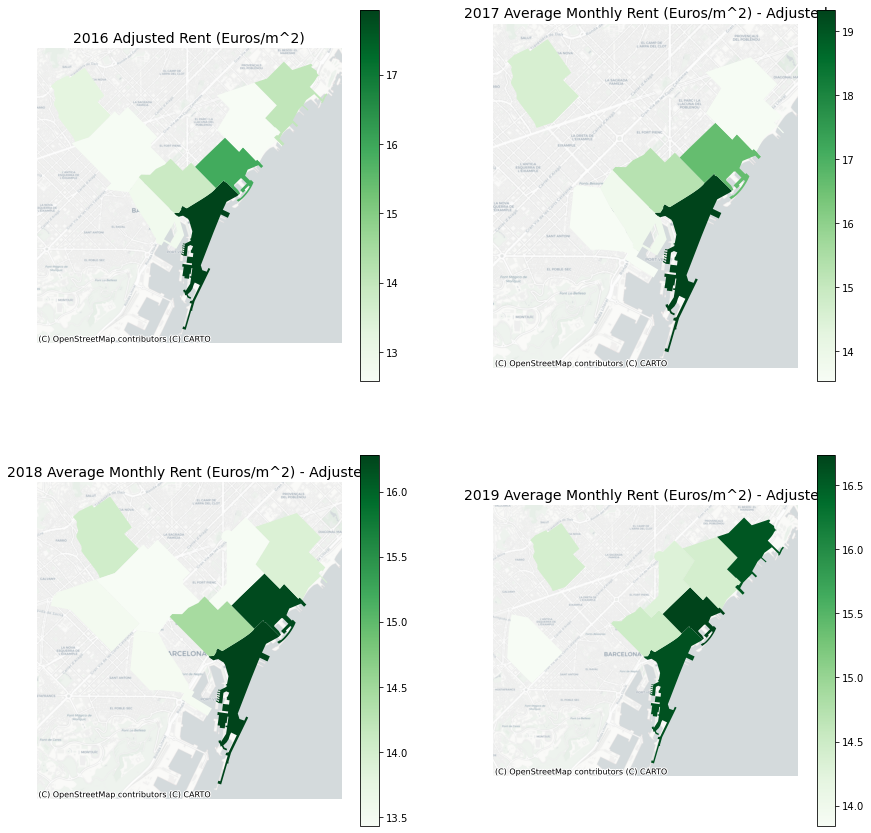

In [22]:
# Map neighborhoods with the highest adjusted monthly rent/m^2 and the highest quantity of total Airbnbs. 

column1 = '2016 Average Monthly Rent (Euros/m^2) - Adjusted'
column2 = '2017 Average Monthly Rent (Euros/m^2) - Adjusted'
column3 = '2018 Average Monthly Rent (Euros/m^2) - Adjusted'
column4 = '2019 Average Monthly Rent (Euros/m^2) - Adjusted'

fig,ax = plt.subplots(2,2,figsize=(15,15))

ab_rent16_Q4_web_mercator.plot(ax=ax[0,0],
         column=column1,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[0].set_ylim(33.6,34.9)
ax[0,0].set_title('2016 Adjusted Rent (Euros/m^2)', fontsize=14)
ax[0,0].axis('off');

ab_rent17_Q4_web_mercator.plot(ax=ax[0,1],
         column=column2,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[0,1].set_title(column2, fontsize=14)
ax[0,1].axis('off');

ab_rent18_Q4_web_mercator.plot(ax=ax[1,0],
         column=column3,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[1,0].set_title(column3, fontsize=14)
ax[1,0].axis('off');

ab_rent19_Q4_web_mercator.plot(ax=ax[1,1],
         column=column4,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[1,1].set_title(column4, fontsize=14)
ax[1,1].axis('off');

ctx.add_basemap(ax[0,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[0,1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,1],source=ctx.providers.CartoDB.Positron)               

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



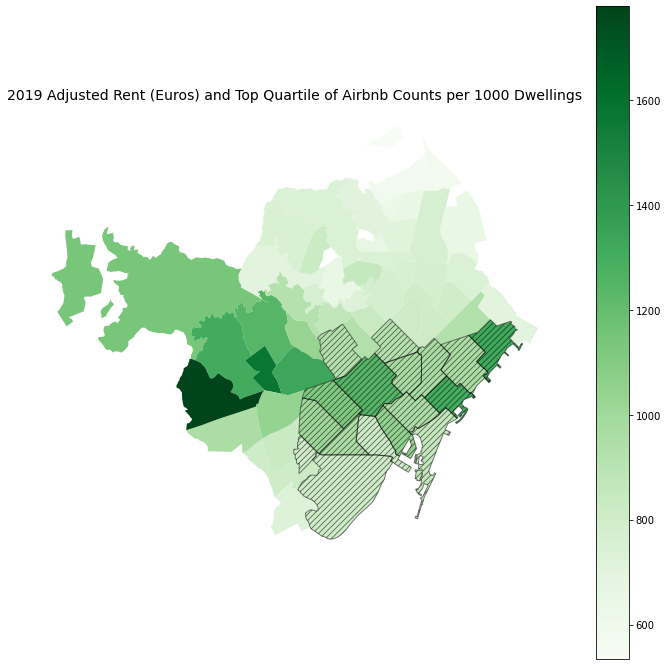

In [24]:
# Overlay map with 2019 Adjusted average monthly rent and top quartile 2019 Airbnb counts

df = ab_rent[ab_rent['2019 Airbnb Quartile']=='Q4']

fig,ax = plt.subplots(figsize=(12,12))

ab_rent.plot(ax=ax,
         column='2019 Average Monthly Rent (Euros) - Adjusted',
         legend=True,
         cmap='Greens'
        )

df.plot(ax=ax,
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        facecolor="none", 
        color='none',
        )

ax.set_title('2019 Adjusted Rent (Euros) and Top Quartile of Airbnb Counts per 1000 Dwellings', fontsize=14)
ax.axis('off');

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



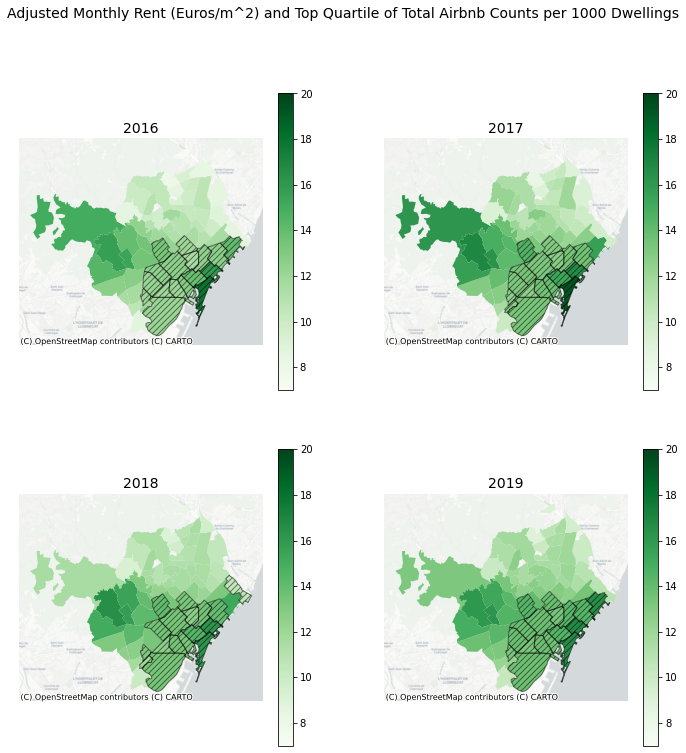

In [25]:
# Map Adjusted Monthly Rent (Euros/m^2) and Top Quartile of Total Airbnb Counts per 1000 Dwellings

df16 = ab_rent[ab_rent['2016 Airbnb Quartile']=='Q4']
df17 = ab_rent[ab_rent['2017 Airbnb Quartile']=='Q4']
df18 = ab_rent[ab_rent['2018 Airbnb Quartile']=='Q4']
df19 = ab_rent[ab_rent['2019 Airbnb Quartile']=='Q4']

ab_rent_web_mercator = ab_rent.to_crs(epsg=3857)
df16_web_mercator = df16.to_crs(epsg=3857)
df17_web_mercator = df17.to_crs(epsg=3857)
df18_web_mercator = df18.to_crs(epsg=3857)
df19_web_mercator = df19.to_crs(epsg=3857)

fig,ax = plt.subplots(2,2,figsize=(12,12))

ab_rent_web_mercator.plot(ax=ax[0,0],
         column='2016 Average Monthly Rent (Euros/m^2) - Adjusted',
         legend=True,vmin=7, vmax=20,
         cmap='Greens'
        )

df16_web_mercator.plot(ax=ax[0,0],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[0,0].set_title('2016', fontsize=14)
ax[0,0].axis('off');

ab_rent_web_mercator.plot(ax=ax[0,1],
         column='2017 Average Monthly Rent (Euros/m^2) - Adjusted',
         legend=True,vmin=7, vmax=20,
         cmap='Greens'
        )

df17_web_mercator.plot(ax=ax[0,1],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[0,1].set_title('2017', fontsize=14)
ax[0,1].axis('off');

ab_rent_web_mercator.plot(ax=ax[1,0],
         column='2018 Average Monthly Rent (Euros/m^2) - Adjusted',
         legend=True,vmin=7, vmax=20,
         cmap='Greens'
        )

df18_web_mercator.plot(ax=ax[1,0],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[1,0].set_title('2018', fontsize=14)
ax[1,0].axis('off');

ab_rent_web_mercator.plot(ax=ax[1,1],
         column='2019 Average Monthly Rent (Euros/m^2) - Adjusted',
         legend=True,vmin=7, vmax=20,
         cmap='Greens'
        )

df19_web_mercator.plot(ax=ax[1,1],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[1,1].set_title('2019', fontsize=14)
ax[1,1].axis('off');

ctx.add_basemap(ax[0,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[0,1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,1],source=ctx.providers.CartoDB.Positron) 

fig.suptitle("Adjusted Monthly Rent (Euros/m^2) and Top Quartile of Total Airbnb Counts per 1000 Dwellings", fontsize=14)

plt.savefig('Output/Adjusted_Rentm2_and_AirbnbTot_Q4.png',bbox_inches='tight',transparent=True)

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



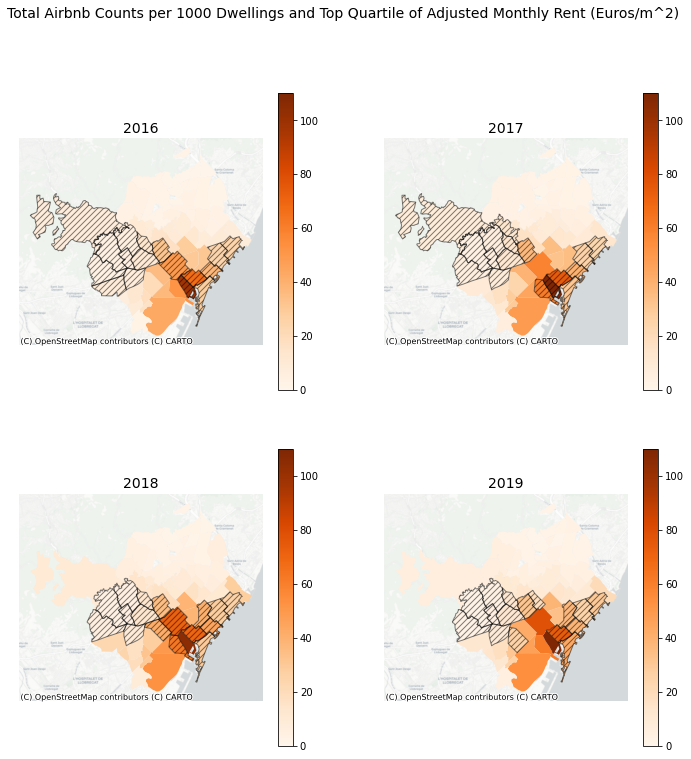

In [26]:
# Map Total Airbnb Counts per 1000 Dwellings and Top Quartile of Adjusted Monthly Rent (Euros/m^2)

df16 = ab_rent[ab_rent['2016 Adjusted Rent/m^2 Quartile']=='Q4']
df17 = ab_rent[ab_rent['2017 Adjusted Rent/m^2 Quartile']=='Q4']
df18 = ab_rent[ab_rent['2018 Adjusted Rent/m^2 Quartile']=='Q4']
df19 = ab_rent[ab_rent['2019 Adjusted Rent/m^2 Quartile']=='Q4']

ab_rent_web_mercator = ab_rent.to_crs(epsg=3857)
df16_web_mercator = df16.to_crs(epsg=3857)
df17_web_mercator = df17.to_crs(epsg=3857)
df18_web_mercator = df18.to_crs(epsg=3857)
df19_web_mercator = df19.to_crs(epsg=3857)

fig,ax = plt.subplots(2,2,figsize=(12,12))

ab_rent_web_mercator.plot(ax=ax[0,0],
         column='bnb16_per_1000',
         legend=True,vmin=0, vmax=110,
         cmap='Oranges'
        )

df16_web_mercator.plot(ax=ax[0,0],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[0,0].set_title('2016', fontsize=14)
ax[0,0].axis('off');

ab_rent_web_mercator.plot(ax=ax[0,1],
         column='bnb17_per_1000',
         legend=True,vmin=0, vmax=110,
         cmap='Oranges'
        )

df17_web_mercator.plot(ax=ax[0,1],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[0,1].set_title('2017', fontsize=14)
ax[0,1].axis('off');

ab_rent_web_mercator.plot(ax=ax[1,0],
         column='bnb18_per_1000',
         legend=True,vmin=0, vmax=110,
         cmap='Oranges'
        )

df18_web_mercator.plot(ax=ax[1,0],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[1,0].set_title('2018', fontsize=14)
ax[1,0].axis('off');

ab_rent_web_mercator.plot(ax=ax[1,1],
         column='bnb19_per_1000',
         legend=True,vmin=0, vmax=110,
         cmap='Oranges'
        )

df19_web_mercator.plot(ax=ax[1,1],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        #facecolor="none", 
        color='none',
        )

ax[1,1].set_title('2019', fontsize=14)
ax[1,1].axis('off');

ctx.add_basemap(ax[0,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[0,1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,1],source=ctx.providers.CartoDB.Positron) 

fig.suptitle("Total Airbnb Counts per 1000 Dwellings and Top Quartile of Adjusted Monthly Rent (Euros/m^2)", fontsize=14)

plt.savefig('Output/Adjusted_Rentm2_Q4_and_AirbnbTot_per1000.png',bbox_inches='tight',transparent=True)

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



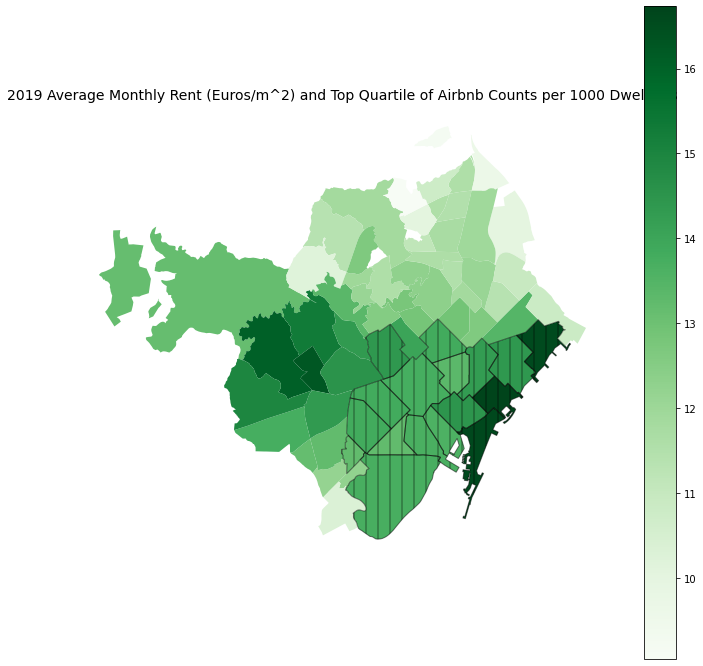

In [27]:
# map the 2019 Average Monthly Rent (Euros/m^2) and Top Quartile of Airbnb Counts per 1000 Dwellings

df = ab_rent[ab_rent['2019 Airbnb Quartile']=='Q4']

fig,ax = plt.subplots(figsize=(12,12))

ab_rent.plot(ax=ax,
         column='2019 Average Monthly Rent (Euros/m^2) - Adjusted',
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

df.plot(ax=ax,
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="|",
        facecolor="none", 
        color='none',
        #opacity=0.5
        #cmap = 'Oranges'
        )

#ax.set_ylim(33.6,34.9)
ax.set_title('2019 Average Monthly Rent (Euros/m^2) and Top Quartile of Airbnb Counts per 1000 Dwellings', fontsize=14)
ax.axis('off');

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:641: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



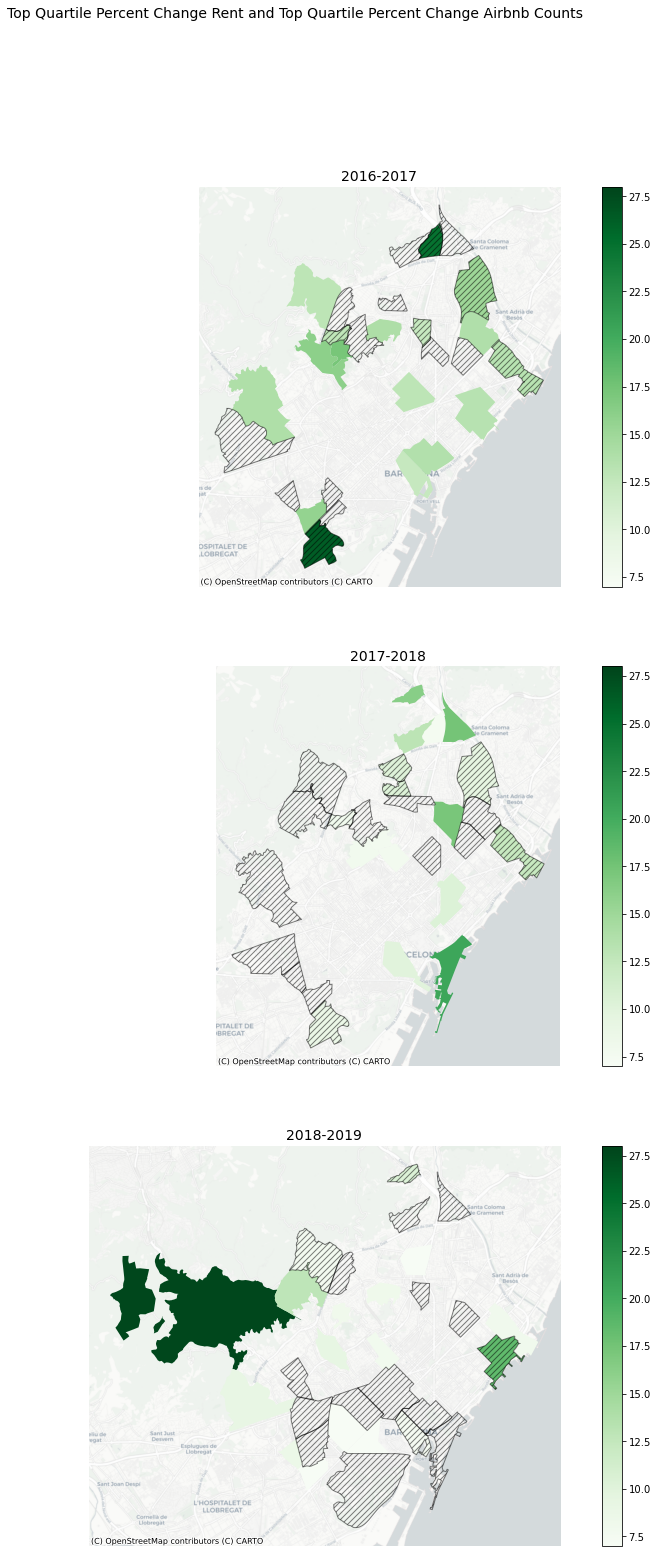

In [29]:
# map the Top Quartile Percent Change Rent and Top Quartile Percent Change Airbnb Counts

df1 = ab_rent[ab_rent['2016-2017 % Change Rent Quartile']=='Q4']
df2 = ab_rent[ab_rent['2017-2018 % Change Rent Quartile']=='Q4']
df3 = ab_rent[ab_rent['2018-2019 % Change Rent Quartile']=='Q4']

df4 = ab_rent[ab_rent['2016-2017 % Change Airbnb Quartile']=='Q4']
df5 = ab_rent[ab_rent['2017-2018 % Change Airbnb Quartile']=='Q4']
df6 = ab_rent[ab_rent['2018-2019 % Change Airbnb Quartile']=='Q4']

df1_web_mercator = df1.to_crs(epsg=3857)
df2_web_mercator = df2.to_crs(epsg=3857)
df3_web_mercator = df3.to_crs(epsg=3857)
df4_web_mercator = df4.to_crs(epsg=3857)
df5_web_mercator = df5.to_crs(epsg=3857)
df6_web_mercator = df6.to_crs(epsg=3857)

fig,ax = plt.subplots(3,1,figsize=(15,25))

df1_web_mercator.plot(ax=ax[0],
         column='Percent Change Average Monthly Rent 2016-2017',
         legend=True, vmin=7,vmax=28,
         cmap='Greens'
        )

df4_web_mercator.plot(ax=ax[0],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        facecolor="none", 
        color='none',
        )
ax[0].set_title('2016-2017', fontsize=14)
ax[0].axis('off');

df2_web_mercator.plot(ax=ax[1],
         column='Percent Change Average Monthly Rent 2017-2018',
         legend=True,vmin=7,vmax=28,
         cmap='Greens'
        )

df5_web_mercator.plot(ax=ax[1],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        facecolor="none", 
        color='none',
        )
ax[1].set_title('2017-2018', fontsize=14)
ax[1].axis('off');

df3_web_mercator.plot(ax=ax[2],
         column='Percent Change Average Monthly Rent 2018-2019',
         legend=True,vmin=7,vmax=28,
         cmap='Greens'
        )

df6_web_mercator.plot(ax=ax[2],
        column='c_barri',
        alpha=.5,
        linewidth=1,
        hatch="////",
        facecolor="none", 
        color='none',
        )
ax[2].set_title('2018-2019', fontsize=14)
ax[2].axis('off');


ctx.add_basemap(ax[0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[2],source=ctx.providers.CartoDB.Positron)

fig.suptitle("Top Quartile Percent Change Rent and Top Quartile Percent Change Airbnb Counts", fontsize=14)

plt.savefig('Output/Percent_Change_Rent_Q4_and_Percent_Change_Airbnb_Q4.png',bbox_inches='tight',transparent=True)

In [ ]:
df = ab_rent16_Q4

fig = px.choropleth_mapbox(df, geojson=df.geometry, color="2016 Average Monthly Rent (Euros) - Adjusted",
                           color_continuous_scale="Viridis",
                           locations=df.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri "},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.write_html("Barri Map with Background.html")
#plt.savefig('Barri Map with Background.png',bbox_inches='tight')
fig.show()

In [ ]:
df = ab_rent1617_Q4

fig = px.choropleth_mapbox(df, geojson=df.geometry, color="Percent Change Average Monthly Rent 2016-2017",
                           color_continuous_scale="Viridis",
                           locations=df.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri "},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.write_html("Barri Map with Background.html")
#plt.savefig('Barri Map with Background.png',bbox_inches='tight')
fig.show()

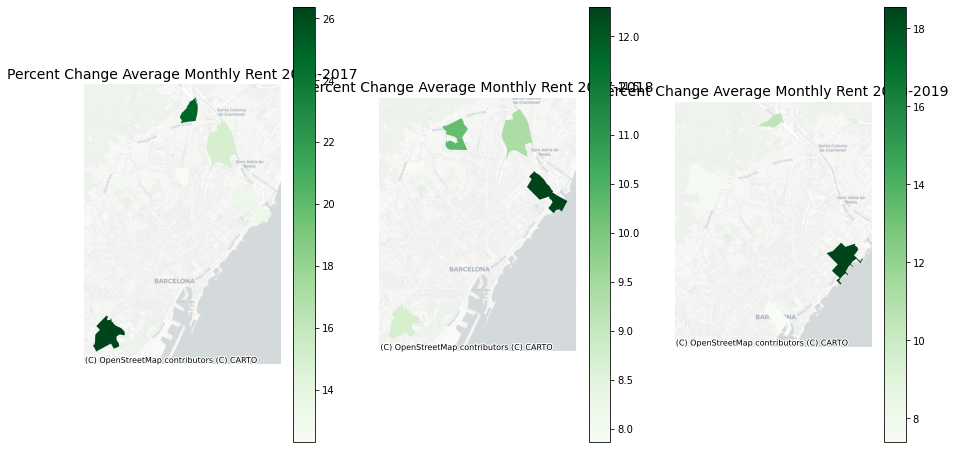

In [33]:
column1 = 'Percent Change Average Monthly Rent 2016-2017'
column2 = 'Percent Change Average Monthly Rent 2017-2018'
column3 = 'Percent Change Average Monthly Rent 2018-2019'

fig,ax = plt.subplots(1,3,figsize=(15,8))

ab_rent1617_Q4_web_mercator.plot(ax=ax[0],
         column=column1,
         legend=True,
         cmap='Greens'
        )


ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

ab_rent1718_Q4_web_mercator.plot(ax=ax[1],
         column=column2,
         legend=True,
         cmap='Greens'
        )


ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');

ab_rent1819_Q4_web_mercator.plot(ax=ax[2],
         column=column3,
         legend=True,
         cmap='Greens'
        )


ax[2].set_title(column3, fontsize=14)
ax[2].axis('off');

ctx.add_basemap(ax[0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[2],source=ctx.providers.CartoDB.Positron)
              

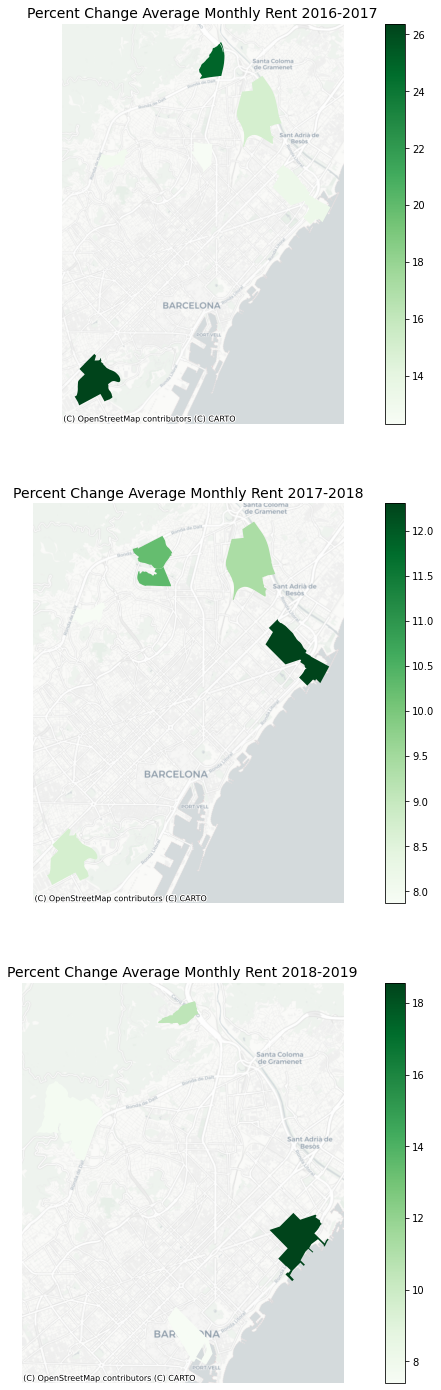

In [34]:
#map the query of Q4 for % change monthly rent and % change airbnb

column1 = 'Percent Change Average Monthly Rent 2016-2017'
column2 = 'Percent Change Average Monthly Rent 2017-2018'
column3 = 'Percent Change Average Monthly Rent 2018-2019'



fig,ax = plt.subplots(3,1,figsize=(15,25))

ab1617_rent1617_Q4_web_mercator.plot(ax=ax[0],
         column=column1,
         legend=True,
         cmap='Greens'
        )


ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

ab1718_rent1718_Q4_web_mercator.plot(ax=ax[1],
         column=column2,
         legend=True,
         cmap='Greens'
        )


ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');

ab1819_rent1819_Q4_web_mercator.plot(ax=ax[2],
         column=column3,
         legend=True,
         cmap='Greens'
        )


ax[2].set_title(column3, fontsize=14)
ax[2].axis('off');

ctx.add_basemap(ax[0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[2],source=ctx.providers.CartoDB.Positron)
              

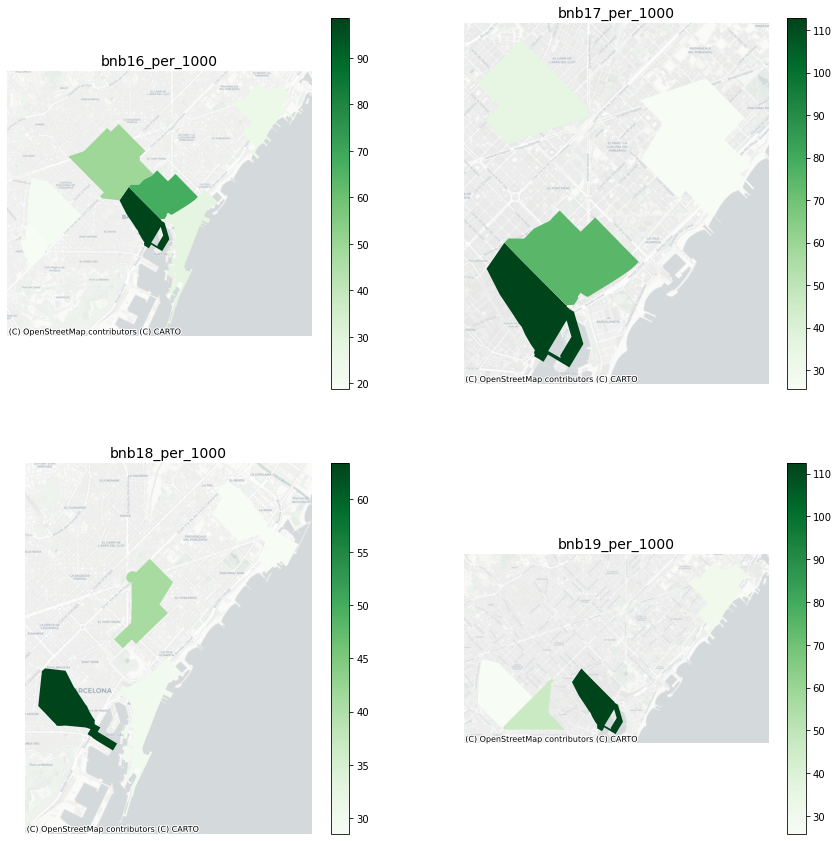

In [35]:
#map the query for Q4 for percent change in rent and total airbnb counts

column1 = 'bnb16_per_1000'
column2 = 'bnb17_per_1000'
column3 = 'bnb18_per_1000'
column4 = 'bnb19_per_1000'

fig,ax = plt.subplots(2,2,figsize=(15,15))

ab16_rent1516_Q4_web_mercator.plot(ax=ax[0,0],
         column=column1,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[0].set_ylim(33.6,34.9)
ax[0,0].set_title(column1, fontsize=14)
ax[0,0].axis('off');

ab17_rent1617_Q4_web_mercator.plot(ax=ax[0,1],
         column=column2,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[0,1].set_title(column2, fontsize=14)
ax[0,1].axis('off');

ab18_rent1718_Q4_web_mercator.plot(ax=ax[1,0],
         column=column3,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[1,0].set_title(column3, fontsize=14)
ax[1,0].axis('off');

ab19_rent1819_Q4_web_mercator.plot(ax=ax[1,1],
         column=column4,
         legend=True,
         #scheme='user_defined', 
         #classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

#ax[1].set_ylim(33.6,34.9)
ax[1,1].set_title(column4, fontsize=14)
ax[1,1].axis('off');

ctx.add_basemap(ax[0,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[0,1],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,0],source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(ax[1,1],source=ctx.providers.CartoDB.Positron)               

## End of File 

End of file. This file was collaborative, and we analyzed relationships and talked through potential trends. 